Week 4 Project :   Customer Segmentation using Clustering
- In this project, we worked on Unsupervised Learning.  
- Our goal was to group customers based on their behavior.  
- We used the famous Mall Customers Dataset from Kaggle.  
- Techniques applied → K-Means, Hierarchical Clustering, PCA, t-SNE, and GridSearchCV.  

Problem Statement:
- Businesses want to understand customers better.  
- Clustering helps in identifying **similar customer groups**.  
- These groups can be used for:  
   - Personalized marketing  
   - Targeted offers  
   - Improving customer experience  

Dataset Details:
- Dataset: Mall Customers (Kaggle)  
- Size: 200 entries  
- Features:  
   - Gender  
   - Age  
   - Annual Income  
   - Spending Score  
- Target: No labels (unsupervised learning task)  

Data Preparation:
- Dropped irrelevant columns (CustomerID).  
- Encoded categorical feature (Gender → 0/1).  
- Scaled features using StandardScaler.  
- Prepared data for clustering.  

Exploratory Data Analysis:
- Visualized distributions and correlations.  
- Found relation between Income and Spending Score.  
- Observed that customers form natural groups.  
- Outliers handled, scaling applied.  

Clustering Approach:
- Applied K-Means Clustering.  
- Used Elbow Method & Silhouette Score for choosing clusters.   
- Visualization done using PCA (2D) and t-SNE.

Model Tuning:
- Used GridSearchCV with PCA + KMeans pipeline.  
- Tuned parameters:  
   - Number of clusters(K)  
   - PCA components

Insights:
- Cluster 0 → High income, high spending → Premium Customers  
- Cluster 1 → Low income, low spending → Budget Customers  
- Cluster 2 → Young medium spenders → Growth Potential  
- Cluster 3 & 4 → Other meaningful patterns  
- Businesses can now target customers more effectively.  

Conclusion
- Successfully applied **Unsupervised Learning** on customer dataset.  
- Achieved meaningful segmentation of mall customers.  
- Techniques like PCA & t-SNE improved visualization.  
- Model tuning enhanced clustering quality.  
- This project shows how ML helps in data-driven marketing decisions.

In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics import silhouette_score, davies_bouldin_score
from sklearn.manifold import TSNE
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
import joblib


In [15]:
from google.colab import files
uploaded = files.upload()
import pandas as pd

df = pd.read_csv("Mall_Customers.csv")
df.head()


Saving Mall_Customers.csv to Mall_Customers (2).csv


,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [16]:
X = df.drop(["CustomerID"], axis=1)
X["Genre"] = X["Genre"].map({"Male": 0, "Female": 1})
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


       CustomerID         Age  Annual Income (k$)  Spending Score (1-100)
count  200.000000  200.000000          200.000000              200.000000
mean   100.500000   38.850000           60.560000               50.200000
std     57.879185   13.969007           26.264721               25.823522
min      1.000000   18.000000           15.000000                1.000000
25%     50.750000   28.750000           41.500000               34.750000
50%    100.500000   36.000000           61.500000               50.000000
75%    150.250000   49.000000           78.000000               73.000000
max    200.000000   70.000000          137.000000               99.000000


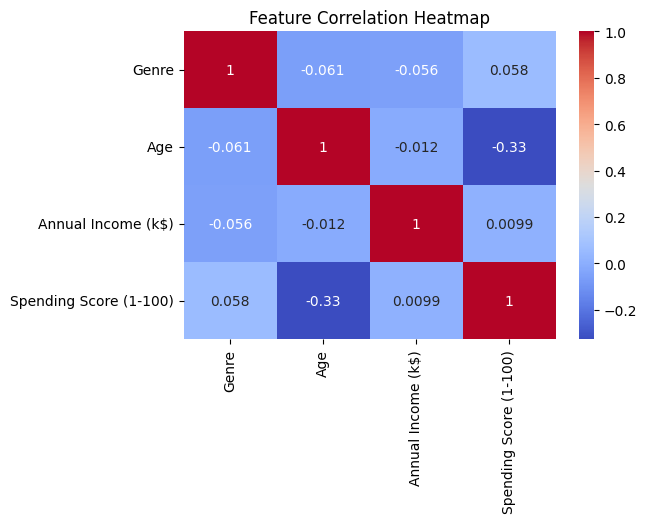

In [17]:
print(df.describe())

# Correlation Heatmap
plt.figure(figsize=(6,4))
sns.heatmap(X.corr(), annot=True, cmap="coolwarm")
plt.title("Feature Correlation Heatmap")
plt.show()


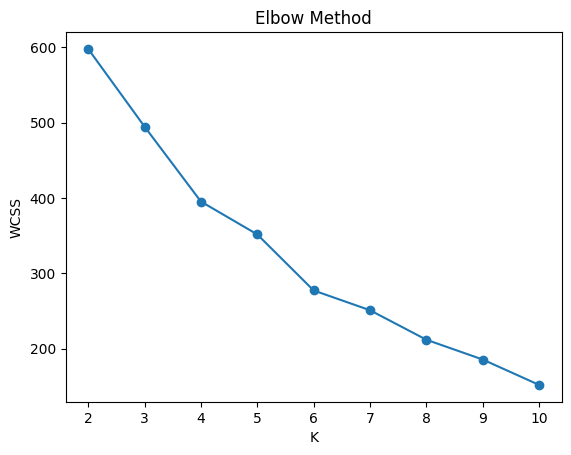

In [18]:
# Clustering - Elbow Method
wcss = []
for k in range(2, 11):
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(X_scaled)
    wcss.append(km.inertia_)

plt.plot(range(2, 11), wcss, marker='o')
plt.xlabel("K")
plt.ylabel("WCSS")
plt.title("Elbow Method")
plt.show()


In [19]:
# Apply KMeans with chosen clusters
kmeans = KMeans(n_clusters=5, random_state=42)
clusters = kmeans.fit_predict(X_scaled)

df["Cluster"] = clusters

print("Silhouette Score:", silhouette_score(X_scaled, clusters))
print("Davies-Bouldin Score:", davies_bouldin_score(X_scaled, clusters))


Silhouette Score: 0.27191023466188324
Davies-Bouldin Score: 1.181091452406171


In [20]:
#  Model Tuning using GridSearchCV
pipe = Pipeline([
    ('pca', PCA()),
    ('kmeans', KMeans(random_state=42))
])

param_grid = {
    'pca__n_components': [2, 3, 4],
    'kmeans__n_clusters': [3, 4, 5, 6]
}

def silhouette_scorer(estimator, X):
    clusters = estimator.predict(X)
    return silhouette_score(X, clusters)

grid = GridSearchCV(pipe, param_grid, scoring=silhouette_scorer, cv=3)
grid.fit(X_scaled)

print("Best Parameters:", grid.best_params_)


Best Parameters: {'kmeans__n_clusters': 5, 'pca__n_components': 4}


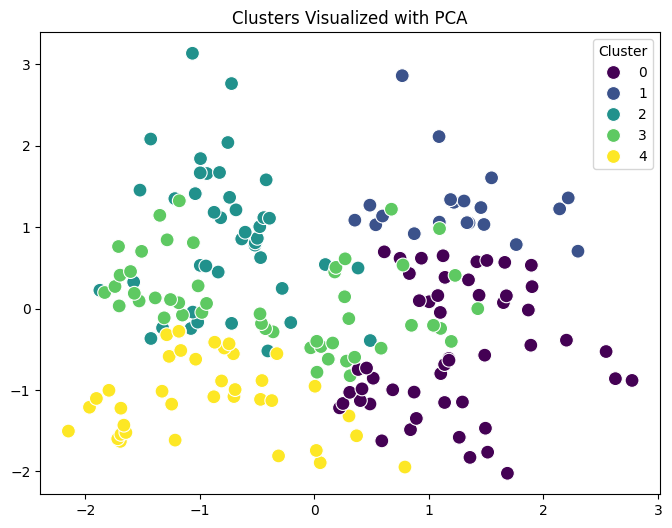

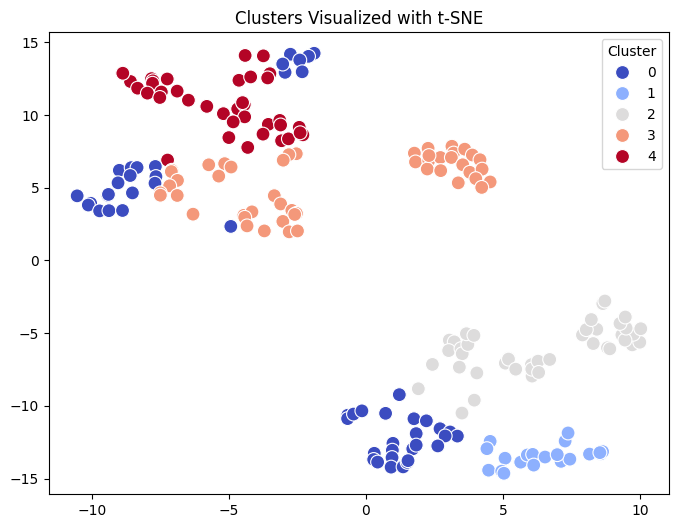

In [21]:
#  Visualization

# PCA Visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(8,6))
sns.scatterplot(x=X_pca[:,0], y=X_pca[:,1], hue=df["Cluster"], palette="viridis", s=100)
plt.title("Clusters Visualized with PCA")
plt.show()

# t-SNE Visualization
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X_scaled)

plt.figure(figsize=(8,6))
sns.scatterplot(x=X_tsne[:,0], y=X_tsne[:,1], hue=df["Cluster"], palette="coolwarm", s=100)
plt.title("Clusters Visualized with t-SNE")
plt.show()


In [22]:
# Insights
numeric_cols = df.select_dtypes(include=[np.number]).columns

cluster_insights = df.groupby("Cluster")[numeric_cols].mean()
print(cluster_insights)


         CustomerID        Age  Annual Income (k$)  Spending Score (1-100)  \
Cluster                                                                      
0         65.333333  56.470588           46.098039               39.313725   
1        159.500000  39.500000           85.150000               14.050000   
2        100.809524  28.690476           60.904762               70.238095   
3        151.510204  37.897959           82.122449               54.448980   
4         50.526316  27.315789           38.842105               56.210526   

         Cluster  
Cluster           
0            0.0  
1            1.0  
2            2.0  
3            3.0  
4            4.0  


In [23]:

joblib.dump(kmeans, "kmeans_customer_segmentation.pkl")


['kmeans_customer_segmentation.pkl']